In [1]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import ast
import seaborn as sns
from adjustText import adjust_text

dataset = load_dataset('Jamiefor3/Worldwide_Layoffs_Data')
df = dataset['train'].to_pandas()

df['date'] = pd.to_datetime(df['date'])

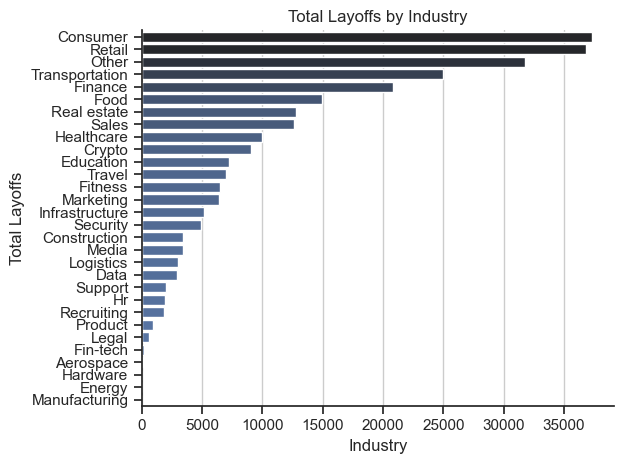

In [99]:
industry_layoffs = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).reset_index().copy()

sns.set_theme(style='ticks')
sns.barplot(data=industry_layoffs, y='industry', x='total_laid_off', hue='total_laid_off', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Total Layoffs by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Layoffs')
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()

In [3]:
# Calculate the average and median percentage of layoffs
average_percentage = df['percentage_laid_off'].mean()
median_percentage = df['percentage_laid_off'].median()

# Print the results
print(f"Average Percentage of Layoffs: {average_percentage:.2%}")
print(f"Median Percentage of Layoffs: {median_percentage:.2%}")


Average Percentage of Layoffs: 21.41%
Median Percentage of Layoffs: 15.00%


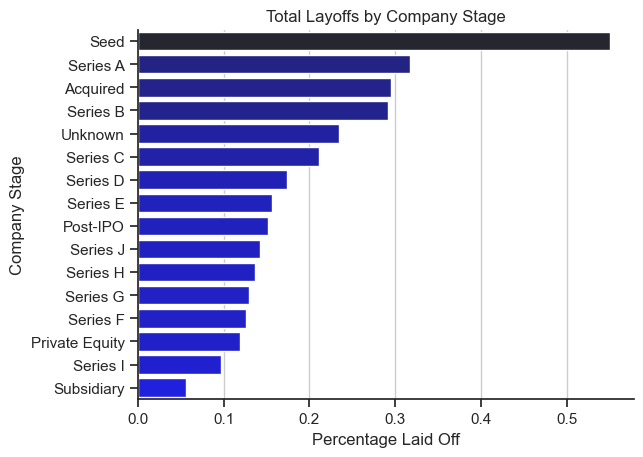

In [103]:
stage_layoffs = df.groupby('stage')['percentage_laid_off'].mean().sort_values(ascending=False).reset_index().copy()

# Create a bar plot to visualize the total layoffs by company stage
sns.barplot(y='stage', x='percentage_laid_off', data=stage_layoffs, hue ='percentage_laid_off', palette='dark:blue_r', legend=False)

# Customize the plot
sns.despine()
plt.title('Total Layoffs by Company Stage')
plt.xlabel('Percentage Laid Off')
plt.ylabel('Company Stage')
plt.grid(True, axis='x')
plt.show()

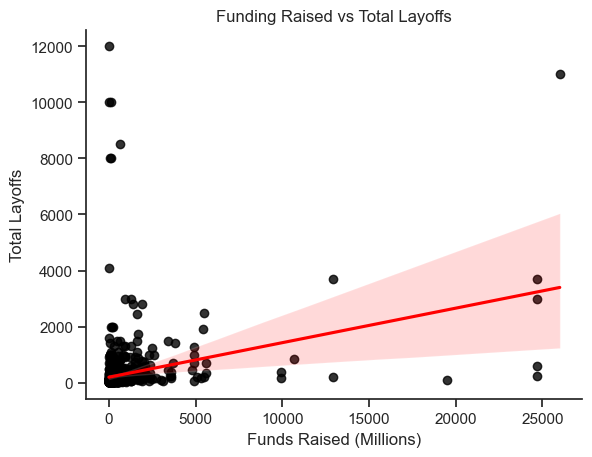

In [104]:
funds_no_outliers = df[df['funds_raised_millions'] <=120000].copy()
sns.regplot(x='funds_raised_millions', y='total_laid_off', data=funds_no_outliers, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
sns.despine()
plt.title('Funding Raised vs Total Layoffs')
plt.xlabel('Funds Raised (Millions)')
plt.ylabel('Total Layoffs')
plt.show()

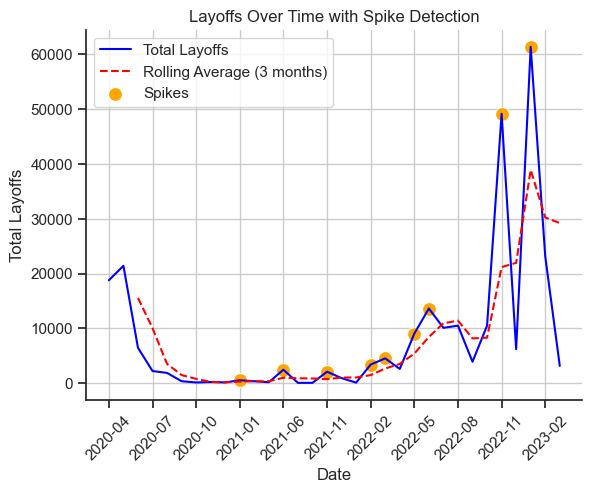

In [105]:
df_month = df.groupby(df['date'].dt.to_period('M'))['total_laid_off'].sum().reset_index().copy()
# Calculate the rolling average to smooth out the trend
df_month['rolling_avg'] = df_month['total_laid_off'].rolling(window=3).mean()

# Create the plot using seaborn
sns.lineplot(x=df_month['date'].astype(str), y=df_month['total_laid_off'], label='Total Layoffs', color='blue')
sns.lineplot(x=df_month['date'].astype(str), y=df_month['rolling_avg'], label='Rolling Average (3 months)', color='red', linestyle='--')

# Highlight spikes (values greater than 1.5x rolling average)
spikes = df_month[df_month['total_laid_off'] > df_month['rolling_avg'] * 1.5]
sns.scatterplot(x=spikes['date'].astype(str), y=spikes['total_laid_off'], color='orange', label='Spikes', s=100)

# Customize the plot
sns.despine()
plt.title('Layoffs Over Time with Spike Detection')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
ticks = df_month.index[::3]
tick_labels = df_month['date'].iloc[::3]
plt.xticks(ticks, tick_labels, rotation=45)
plt.legend()
plt.grid(True)

plt.show()

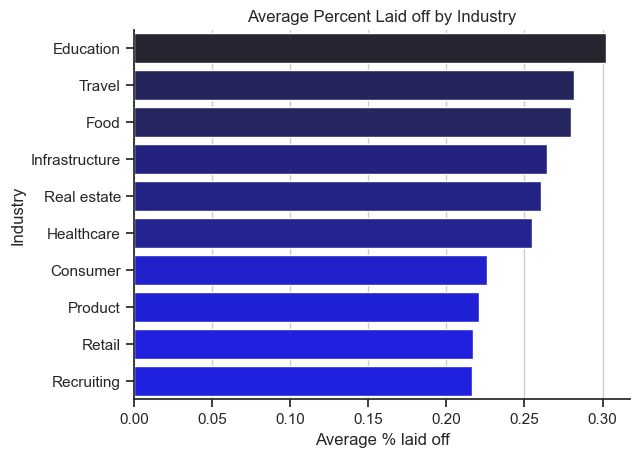

In [106]:
industry_counts = df['industry'].value_counts().copy()
filtered_industry = industry_counts[industry_counts >= 10].index
df_filtered_industry = df[df['industry'].isin(filtered_industry)]
industry_perc_plot = df_filtered_industry.groupby('industry')['percentage_laid_off'].mean().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=industry_perc_plot, x='percentage_laid_off', y='industry', hue='percentage_laid_off', palette='dark:blue_r', legend=False)
sns.despine()
plt.title('Average Percent Laid off by Industry')
plt.ylabel('Industry')
plt.xlabel('Average % laid off')
plt.grid(True, axis='x')
plt.show()


In [ ]:


# Now we can use this 'continent' column for coloring in the scatter plot


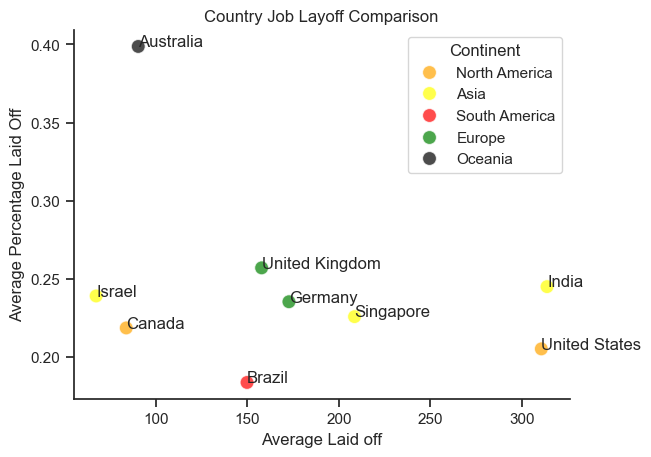

In [ ]:
country_counts = df['country'].value_counts().copy()

country_totals = df.groupby('country').agg({
    'total_laid_off': 'mean',
    'percentage_laid_off': 'mean'
})

country_totals['country_count'] = country_totals.index.map(country_counts)
country_totals = country_totals.sort_values(by='country_count', ascending=False).head(9)

continent_mapping = {
    'Australia': 'Oceania',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'India': 'Asia',
    'Brazil': 'South America',
    'Israel': 'Asia',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Singapore': 'Asia'
}

continent_colors = {
    'Europe': 'green',
    'North America': 'orange',
    'South America': 'red',
    'Asia': 'yellow',
    'Oceania': 'black'
}

country_totals['Continent'] = country_totals.index.map(continent_mapping)

sns.scatterplot(data=country_totals, x='total_laid_off', y='percentage_laid_off', s= 100, hue='Continent', palette=continent_colors, alpha= 0.7 )
for i, txt in enumerate(country_totals.index):
    plt.annotate(txt, 
                 (country_totals['total_laid_off'].iloc[i], 
                  country_totals['percentage_laid_off'].iloc[i]))

sns.despine()
plt.title('Country Job Layoff Comparison')
plt.xlabel('Average Laid off')
plt.ylabel('Average Percentage Laid Off')
plt.show()
